# Using pandas and scikit-learn for classification Ambient data

## Getting Started

## Overview

* Hitting the highlights
* Pandas for Data Wrangling
  * Overview
  * Reading data
  * Exploration
  * GroupBy
  * Plotting
  * Advanced Indexing
  * Categorical Data
* Scikit-Learn for Classification
  * API Overview
  * Preprocessing
  * Decision Trees
  * Gradient Boosting Trees
  * Random Forests
  * Cross-Validation
  * Early Stopping
  * Custom Transformers
  * Pipelines

### Common Imports

In [4]:
import os
import numpy as np
import pandas as pd

## Notebook Specifics

In [5]:
%matplotlib inline
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

## Pretty Graphs

In [8]:
from seaborn import set_style
set_style("darkgrid")
import seaborn as sns
import matplotlib.pyplot as plt


# Pandas for Data Wrangling

## Reading Data

In [9]:
dta = pd.read_csv("data/tessel.csv.gz", compression="gzip", parse_dates=[2])

## Explore the Data

In [10]:
dta.head()

,sound,light,time
0,0.010742,0.011719,2016-04-26 10:13:00
1,0.017578,0.009766,2016-04-26 10:13:00
2,0.013672,0.009766,2016-04-26 10:13:00
3,0.016602,0.012695,2016-04-26 10:13:00
4,0.012695,0.010742,2016-04-26 10:13:00


In [10]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
sound    1048575 non-null float64
light    1048575 non-null float64
time     1048575 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 24.0 MB


In [11]:
dta.describe()

,sound,light
count,1.048575e+06,1.048575e+06
mean,1.766029e-02,3.339715e-02
std,2.593450e-03,3.091751e-02
min,0.000000e+00,0.000000e+00
25%,1.562500e-02,9.765630e-03
50%,1.757813e-02,1.757813e-02
75%,1.953125e-02,4.882813e-02
max,1.240234e-01,1.679688e-01


## Pandas Orientation

### Indices

#### Index

In [12]:
dta.index

RangeIndex(start=0, stop=1048575, step=1)

#### Columns

In [13]:
dta.columns

Index([u'sound', u'light', u'time'], dtype='object')

Sanity checks

#### Indexing

In [14]:
dta.ix[[5, 10, 15]]

,sound,light,time
5,0.017578,0.011719,2016-04-26 10:13:00
10,0.015625,0.009766,2016-04-26 10:13:00
15,0.015625,0.009766,2016-04-26 10:13:00


#### Selecting Columns

In [15]:
dta[["sound", "light", "time"]]

,sound,light,time
0,0.010742,0.011719,2016-04-26 10:13:00
1,0.017578,0.009766,2016-04-26 10:13:00
2,0.013672,0.009766,2016-04-26 10:13:00
3,0.016602,0.012695,2016-04-26 10:13:00
4,0.012695,0.010742,2016-04-26 10:13:00
...,...,...,...
1048570,0.015625,0.031250,2016-05-08 16:01:00
1048571,0.016602,0.028320,2016-05-08 16:01:00
1048572,0.015625,0.031250,2016-05-08 16:02:00
1048573,0.014648,0.031250,2016-05-08 16:02:00


In [17]:
type(dta[["time"]])

pandas.core.frame.DataFrame

In [18]:
type(dta["sound"])

pandas.core.series.Series

#### Rows and Columns

In [11]:
dta.ix[[5, 10, 15], ["sound", "light", "time"]]

,sound,light,time
5,0.017578,0.011719,2016-04-26 10:13:00
10,0.015625,0.009766,2016-04-26 10:13:00
15,0.015625,0.009766,2016-04-26 10:13:00


## GroupBy Operations

In [12]:
dta.groupby("time").time.describe()

time                       
2016-04-26 10:13:00  count                      38
                     unique                      1
                     top       2016-04-26 10:13:00
                     freq                       38
                     first     2016-04-26 10:13:00
                                      ...         
2016-05-08 16:02:00  unique                      1
                     top       2016-05-08 16:02:00
                     freq                        3
                     first     2016-05-08 16:02:00
                     last      2016-05-08 16:02:00
dtype: object

In [13]:
grouper = dta.groupby(pd.Grouper(key="time", freq="15Min"))

In [14]:
grouper

In [ ]:
time_map = grouper.time.unique()
time_map.sort_values(inplace=True)

with pd.option_context("max_rows", 20):
    print(time_map)

In [132]:
grouper.sound.apply(lambda x : x.unique()[0])
sound_map.sort_values(inplace=True)

with pd.option_context("max_rows", 20):
    print(sound_map)

NameError: name 'sound_map' is not defined

## Plotting

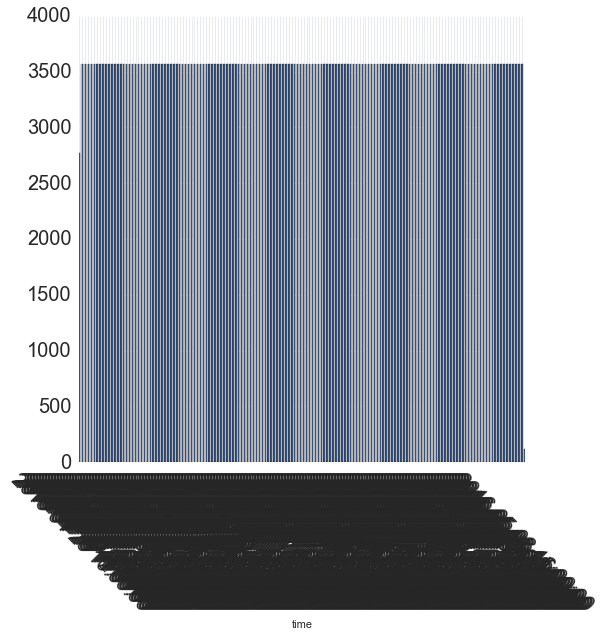

In [16]:
#ax = dta.groupby("time").size().plot(kind="barh", figsize=(8, 8))
ax = dta.groupby(pd.Grouper(key="time", freq="60Min")).size().plot(kind="bar", figsize=(8, 8))

# ax.set_xticklabels([])  # turn off x tick labels

# resize y label
ylabel = ax.yaxis.get_label()
ylabel.set_fontsize(24)

# resize x tick labels
labels = ax.yaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels];

# resize y tick labels
labels = ax.xaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels]
[label.set_rotation(-45) for label in labels];

### Seaborn

In [32]:
import seaborn as sns

In [ ]:
g = sns.factorplot("sound", "light", hue="time", col="light", data=dta)

### Deleting Columns

In [34]:
del dta["education"]
del dta["fnlwgt"]
del test["education"]
del test["fnlwgt"]

### Advanced Indexing

#### Indexing with Booleans

In [36]:
dta.education_num <= 8

0        False
1        False
2        False
3         True
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education_num, dtype: bool

In [37]:
dta.ix[dta.education_num <= 8, "education_num"]

3        7
6        5
15       4
18       7
22       5
        ..
32517    4
32522    7
32526    6
32535    8
32551    6
Name: education_num, dtype: int64

#### .iloc vs .loc

In [38]:
dta.ix[dta.education_num <= 8, "education_num"].iloc[0]

7

In [39]:
dta.ix[dta.education_num <= 8, "education_num"].loc[3]

7

#### Slicing with labels (!)

In [40]:
dta.groupby("workclass").age.mean()

workclass
?                   40.960240
Federal-gov         42.590625
Local-gov           41.751075
Never-worked        20.571429
Private             36.797585
Self-emp-inc        46.017025
Self-emp-not-inc    44.969697
State-gov           39.436055
Without-pay         47.785714
Name: age, dtype: float64

In [41]:
dta.groupby("workclass").age.mean().ix["Federal-gov":"Private"]

workclass
Federal-gov     42.590625
Local-gov       41.751075
Never-worked    20.571429
Private         36.797585
Name: age, dtype: float64

#### Filtering Columns with Regex

In [42]:
dta.filter(regex="capital")

,capital_gain,capital_loss
0,2174,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32556,0,0
32557,0,0
32558,0,0
32559,0,0


### Working with Categorical Data

#### Categorical Object

In [43]:
cat = pd.Categorical(dta.workclass)
cat.describe()

,counts,freqs
categories,,
?,1836,0.056386
Federal-gov,960,0.029483
Local-gov,2093,0.064279
Never-worked,7,0.000215
Private,22696,0.697030
Self-emp-inc,1116,0.034274
Self-emp-not-inc,2541,0.078038
State-gov,1298,0.039864
Without-pay,14,0.000430


In [44]:
cat

[State-gov, Self-emp-not-inc, Private, Private, Private, ..., Private, Private, Private, Private, Self-emp-inc]
Length: 32561
Categories (9, object): [?, Federal-gov, Local-gov, Never-worked, ..., Self-emp-inc, Self-emp-not-inc, State-gov, Without-pay]

In [45]:
cat.categories

Index([u'?', u'Federal-gov', u'Local-gov', u'Never-worked', u'Private',
       u'Self-emp-inc', u'Self-emp-not-inc', u'State-gov', u'Without-pay'],
      dtype='object')

In [46]:
cat.codes

array([7, 6, 4, ..., 4, 4, 5], dtype=int8)

#### Vectorized string operations

In [47]:
dta.workclass.str.contains("\?")

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, dtype: bool

#### Putting it together: Strings and Boolean Indexing

In [48]:
dta.ix[dta.workclass.str.contains("\?"), "workclass"]

27       ?
61       ?
69       ?
77       ?
106      ?
        ..
32530    ?
32531    ?
32539    ?
32541    ?
32542    ?
Name: workclass, dtype: object

#### Putting it together: Column Assignment

In [49]:
dta.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [50]:
for col in dta:  # iterate through column names
    # only look at object types
    if not dta[col].dtype.kind == "O":
        continue
    
    # Replace "?" with "Other"
    if dta[col].str.contains("\?").any():
        dta.ix[dta[col].str.contains("\?"), col] = "Other"
        test.ix[test[col].str.contains("\?"), col] = "Other"

In [51]:
dta.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Other', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

#### Replacing values using dictionaries

In [52]:
dta.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, dtype: object

In [53]:
dta.income.replace({"<=50K": 0, ">50K": 1})

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, dtype: int64

In-place changes

In [54]:
dta.income.replace({"<=50K": 0, ">50K": 1}, inplace=True)

In [55]:
test.income.replace({"<=50K.": 0, ">50K.": 1}, inplace=True)

In [56]:
dta.income.mean()

0.2408095574460244

In [57]:
test.income.mean()

0.23622627602727106

# Classification with Scikit-Learn

## Scikit-Learn API

* Base object is the estimator
* Any object that learns from data
  * Classification, regression, clustering, or transformer 
  
* parameters passed to estimator

```python
    estimator = Estimator(*args, **kwargs)
```

* `fit` method provided

```python
    estimator.fit(X, y)
```
    
* Computed parameters have an underscore appended

```python
    estimator.coef_
```

## Preparing the Data

* scikit-learn works with numerical data

In [58]:
y = dta.pop("income")
y_test = test.pop("income")

In [59]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


## Preprocessing

* Preprocessing for Text, Categorical variables, Standardization etc.

In [60]:
from sklearn.preprocessing import LabelBinarizer

In [61]:
dta.native_country.head(15).values

array(['United-States', 'United-States', 'United-States', 'United-States',
       'Cuba', 'United-States', 'Jamaica', 'United-States',
       'United-States', 'United-States', 'United-States', 'India',
       'United-States', 'United-States', 'Other'], dtype=object)

In [62]:
binarizer = LabelBinarizer()

`fit_transform` is short hand for calling `fit` then `transform`

In [63]:
binarizer.fit_transform(dta.native_country.head(15))

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [64]:
binarizer.classes_

array(['Cuba', 'India', 'Jamaica', 'Other', 'United-States'], 
      dtype='|S13')

Pre-processing with pandas

In [65]:
X_train = pd.get_dummies(dta)

In [66]:
X_test = pd.get_dummies(test)

Deal with real life

In [67]:
X_train.columns.equals(X_test.columns)

False

In [68]:
print(X_train.shape)
print(X_test.shape)

(32561, 91)
(16281, 90)


In [69]:
X_train.columns.difference(X_test.columns)

Index([u'native_country_Holand-Netherlands'], dtype='object')

In [70]:
X_test[X_train.columns.difference(X_test.columns)[0]] = 0

Preserve order

In [71]:
X_test = X_test[X_train.columns]

## Reported Benchmarks

```
|    Algorithm               Error
| -- ----------------        -----
| 1  C4.5                    15.54
| 2  C4.5-auto               14.46
| 3  C4.5 rules              14.94
| 4  Voted ID3 (0.6)         15.64
| 5  Voted ID3 (0.8)         16.47
| 6  T2                      16.84
| 7  1R                      19.54
| 8  NBTree                  14.10
| 9  CN2                     16.00
| 10 HOODG                   14.82
| 11 FSS Naive Bayes         14.05
| 12 IDTM (Decision table)   14.46
| 13 Naive-Bayes             16.12
| 14 Nearest-neighbor (1)    21.42
| 15 Nearest-neighbor (3)    20.35
| 16 OC1                     15.04
```

## Classification and Regression Trees (CART)

* Partition feature space into a set of rectangles via splits that lead to largest information gain
* Fit simple model in each region (e.g., a constant)
* Captures non-linearities and feature interactions
* Note: not strictly necessary to dummy encode variables

In [72]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [73]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=2)

In [74]:
dtree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

In [75]:
export_graphviz(dtree, feature_names=X_train.columns)

Run this if you have graphviz installed
    
    !dot -Tpng tree.dot -o tree.png

Fit the full tree and look at the error

In [77]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

Performs slightly worse than C4.5 with no pruning

In [78]:
from sklearn import metrics

In [79]:
metrics.mean_absolute_error(y_test, dtree.predict(X_test))

0.1768318899330508

Beware overfitting!

In [80]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=10)
dtree.fit(X_train, y)
metrics.mean_absolute_error(y_test, dtree.predict(X_test))

0.13899637614397151

## Aside: Saving Models

* All of the scikit-learn models are picklable
* Using joblib directly is often preferable to using pickle

In [82]:
import joblib

## Ensemble Methods

### Boosting

* Combine many weak classifiers in to one strong one
  * Weak classifier is slightly better than random
* Sequentially apply a classifier to repeatedly modified versions of data
* Each subsequent classifier improves on the mistakes of its predecessor
* For Boosting Trees, the classifier is a decision tree

In [83]:
# Create a random dataset

import numpy as np
rng = np.random.RandomState(1)
groundX = np.sort(rng.uniform(0, 10, size=250), axis=0)
groundy = np.linspace(1, -1, 250) + np.sin(2*groundX).ravel()
idx = np.random.randint(0, 250, size=30)
idx.sort()
XX = groundX[idx]
yy = groundy[idx]
XX = XX[:, np.newaxis]

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=2)

tree1.fit(XX, yy)
y1 = tree1.predict(XX)

resid1 = yy - y1
tree1.fit(XX, resid1)

y2 = tree1.predict(XX)
resid2 = y2 - resid1
tree1.fit(XX, resid2)

y3 = tree1.predict(XX)

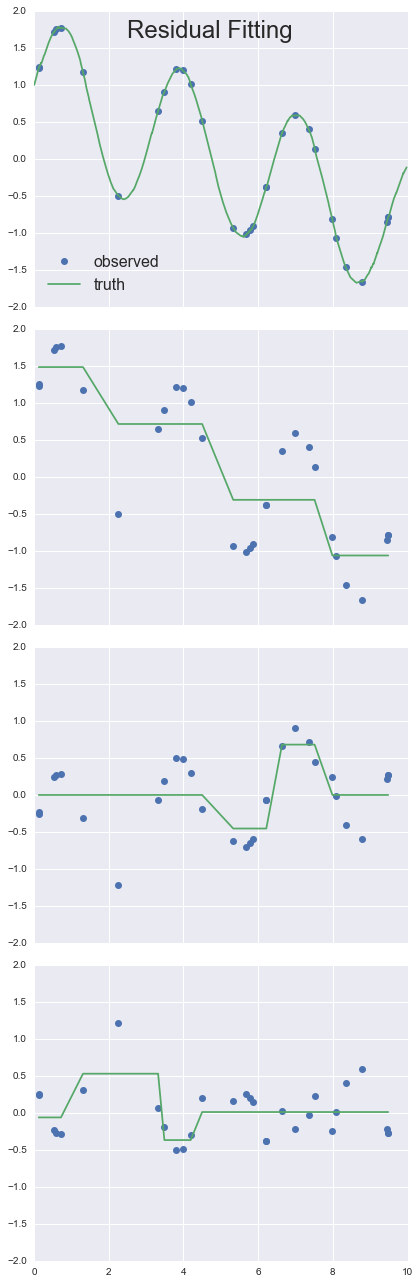

In [85]:
fig, ax = plt.subplots(4, 1, figsize=(6, 18), sharey=True, sharex=True)
ax[0].plot(XX, yy, marker='o', ls='', label='observed')
ax[0].plot(groundX, groundy, label='truth')
ax[0].legend(fontsize=16, loc='lower left');
ax[1].plot(XX, yy, marker='o', ls='')
ax[1].plot(XX, y1)
ax[2].plot(XX, resid1, marker='o', ls='')
ax[2].plot(XX, y2)
ax[3].plot(XX, resid2, marker='o', ls='')
ax[3].plot(XX, y3)
fig.suptitle("Residual Fitting", fontsize=24);
fig.tight_layout()

### Gradient Boosting

* Generalizes boosting to any differentiable loss function

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
if not os.path.exists("models/gbt1.pkl"):
    gbt = GradientBoostingClassifier(max_depth=5, n_estimators=1000)
    gbt.fit(X_train, y)
    joblib.dump(gbt, "models/gbt1.pkl")
else:
    gbt = joblib.load("models/gbt1.pkl")

In [88]:
metrics.mean_absolute_error(y_test, gbt.predict(X_test))

0.13076592346907437

In [89]:
if not os.path.exists("models/gbt2.pkl"):
    gbt = GradientBoostingClassifier(max_depth=8, n_estimators=1000, subsample=.5, random_state=0,
                                    learning_rate=.001)
    gbt.fit(X_train, y)
    joblib.dump(gbt, "models/gbt2.pkl")
else:
    gbt = joblib.load("models/gbt2.pkl")

In [ ]:
metrics.mean_absolute_error(y_test, gbt.predict(X_test))

### Bagging

* Bootstrap aggregating (bagging)
  * Simple bootstrapping is sampling with replacement
* Fit the same learner to many bootstrap samples and average the results
* Random forests builds on the idea of bagging and uses trees
* Performance similar to boosting but can be easier to train and tune

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
if not os.path.exists("models/rf.pkl"):
    rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=4, max_depth=10)
    rf.fit(X_train, y)
    joblib.dump(rf, "models/rf.pkl")
else:
    rf = joblib.load("models/rf.pkl")

In [ ]:
metrics.mean_absolute_error(y_test, rf.predict(X_test))

* Rule of thumb is that you can't really overfit with random forests
  * This is true in general but only to an extent
* Usually ok to grow large forests with full depth trees (problem dependent)
  * Limiting the depth of the trees and the number of trees can be 

In [ ]:
if not os.path.exists("models/rf_full.pkl"):
    rf_full = RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                                     n_jobs=4, max_depth=None)
    rf_full.fit(X_train, y)
    joblib.dump(rf, "models/rf_full.pkl")
else:
    rf_full = joblib.load("models/rf_full.pkl")

In [ ]:
metrics.mean_absolute_error(y_test, rf_full.predict(X_test))

## Validation Methods

### Cross-Validation

* Sampling techniques to ensure low generalization error and avoid overfitting

In [ ]:
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      0, 0, 0, 0, 0, 0,], n_folds=3)
for idx in cv:
    print("train", idx[0], "test", idx[1])

In [ ]:
from sklearn.grid_search import GridSearchCV

cv = StratifiedKFold(y, n_folds=4)

params = {"max_depth": [3, 5, 7]}
gbt = GradientBoostingClassifier(n_estimators=500, learning_rate=.01)

if not os.path.exists("models/grid_search.pkl"):
    estimator = GridSearchCV(gbt, param_grid=params, verbose=2)
    estimator.fit(X_train, y)
    joblib.dump(estimator, "models/grid_search.pkl")
else:
    estimator = joblib.load("models/grid_search.pkl")

### Out-of-bag estimates and Early-stopping

In [ ]:
gbt = GradientBoostingClassifier(learning_rate=.01, n_estimators=1000, subsample=.5)

In [ ]:
gbt.fit(X_train, y)

In [ ]:
metrics.mean_absolute_error(y_test, gbt.predict(X_test))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(gbt.oob_improvement_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Ad-hoc way to do early-stopping

In [ ]:
def monitor(i, self, local_variables):
    start = max(0, i - 4)
    stop = i + 1

    if i > 5 and np.mean(self.oob_improvement_[start:stop]) < 1e-4:
        print("Stopped at {}".format(i))
        return True

In [ ]:
gbt.fit(X_train, y, monitor=monitor)

In [ ]:
print(len(gbt.oob_improvement_))

## Custom Transformers

In [ ]:
def get_obj_cols(dta, index=False):
    """
    dta : pd.DataFrame
    index : bool
        Whether to return column names or the numeric index.
        Default False, returns column names.
    """
    columns = dta.columns.tolist()
    obj_col_names = list(filter(lambda x : dta[x].dtype.kind == "O", 
                                columns))
    if not index:
        return obj_col_names
    else:
        return list(columns.index(col) for col in obj_col_names) 

In [ ]:
obj_cols = get_obj_cols(dta)

for col in obj_cols:
    print(col)

Make a transformer that reliably transforms DataFrames and Arrays

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator


class PandasTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, dataframe):
        self.columns = dataframe.columns
        self.obj_columns = get_obj_cols(dataframe, index=True)
        obj_index = np.zeros(dataframe.shape[1], dtype=bool)
        obj_index[self.obj_columns] = True
        self.obj_index = obj_index
        
        
    def fit(self, X, y=None):
        X = np.asarray(X)
        # create the binarizer transforms
        _transformers = {}
        for col in self.obj_columns:
            _transformers.update({col: LabelBinarizer().fit(X[:, col])})
        
        self._transformers = _transformers
        return self
    
    def transform(self, X, y=None):
        X = np.asarray(X)
        
        dummies = None
        for col in self.obj_columns:
            if dummies is None:
                dummies = self._transformers[col].transform(X[:, col])
            else:
                new_dummy = self._transformers[col].transform(X[:, col])
                dummies = np.column_stack((dummies, new_dummy))
            
        # remove original columns
        X = X[:, ~self.obj_index]
        
        X = np.column_stack((X, dummies))
        
        return X

## Pipelines

* Often it makes sense to do the data transformation, feature extraction, etc. as part of a Pipeline
* Pipelines are flexible and provide the same sklearn API

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
dtree_estimator = Pipeline([('transformer', PandasTransformer(dta)), 
                            ('dtree', dtree)])

In [ ]:
dtree_estimator.fit(dta, y)

In [ ]:
dtree_estimator.named_steps['dtree']